In [0]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import defaultdict

In [2]:
nltk.download('averaged_perceptron_tagger')
!pip install quickdraw

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
# Tokenizes sentence without punctuation
def split_sentence(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(sentence)

# Part-of-speech tagging
def pos_tagging(sentence):
    return nltk.pos_tag(split_sentence(sentence))

# Returns a list of nouns (NN) in a pos-tagged sentence
def extract_objects(sentence):
    pos_tagged_sentence = pos_tagging(sentence)
    obj_lst=[]
    for tagged_word in pos_tagged_sentence:
        if(tagged_word[1]=="NN"):
            obj_lst.append(tagged_word[0])
    return obj_lst

# Alternative: Returns a dictionary with pos-tags as keys
# and list of corresponding words as values 
def generate_pos_dict(pos_tagged_sentence):
    pos_dict = defaultdict(list)
    for word in pos_tagged_sentence:
        pos_dict[word[1]].append(word[0])
    return pos_dict

    
def test(sentence_lst):
    for sentence in sentence_lst:
        print(sentence)
        print(split_sentence(sentence))
        print(pos_tagging(sentence))
        print(extract_objects(sentence))
        print()

In [4]:
sentence = "I see a bird and a dog flying"
sentence2 = "A unicorn."
sentence_lst = [sentence,sentence2]

test(sentence_lst)

I see a bird and a dog flying
['I', 'see', 'a', 'bird', 'and', 'a', 'dog', 'flying']
[('I', 'PRP'), ('see', 'VBP'), ('a', 'DT'), ('bird', 'NN'), ('and', 'CC'), ('a', 'DT'), ('dog', 'NN'), ('flying', 'VBG')]
['bird', 'dog']

A unicorn.
['A', 'unicorn']
[('A', 'DT'), ('unicorn', 'JJ')]
[]



downloading bird from https://storage.googleapis.com/quickdraw_dataset/full/binary/bird.bin
download complete
loading bird drawings
load complete
downloading dog from https://storage.googleapis.com/quickdraw_dataset/full/binary/dog.bin
download complete
loading dog drawings
load complete


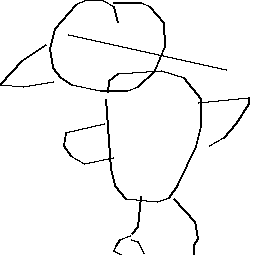

In [5]:
from quickdraw import QuickDrawData
qd = QuickDrawData()

sentence = "I see a bird and a dog flying"
objects = extract_objects(sentence)
img_lst = []

for item in objects:
  img_lst.append(qd.get_drawing(item))

img_lst[0].image